In [168]:
import GPy
import math
import numpy as np
from scipy.spatial.distance import cdist
from scipy.stats import multivariate_normal
from scipy.interpolate import spline
import matplotlib.pyplot as plt

In [184]:
# set GP hyper-parameters
beta = 0.2 # precision of the noise (inverted)
l = 1
gamma = 0.1 # value of diagonal co-variance for the squared exponential

In [194]:
# test data
n = 100
x_test = np.linspace(-math.pi, math.pi, n).reshape(-1, 1)  # calculate GP prior for given data set

In [195]:
def kernel(x1, x2):
    return np.exp((-cdist(x1, x2)**2) / l)

In [196]:
def prior(x):
    mu = np.zeros(x.shape)
    K = np.exp( (-cdist(x, x)**2) / l) + ( gamma * np.eye((np.exp( (-cdist(x, x)**2) / l)).shape[0]) )
    return mu, K

def draw_and_plot_samples(x, mu, cov, num_samples, title):
    f = np.random.multivariate_normal(mu.flatten(), cov, num_samples)
    x1 = np.tile(x, (1, num_samples))
    plt.plot(x1, f.T)
    plt.xlabel('$x$',fontsize=18)
    plt.ylabel('$f$',fontsize=18)
    plt.title(title, fontsize=14)

In [198]:
Kss = kernel(x_test, x_test)
iKss = np.linalg.cholesky(Kss + beta*np.eye(n))
f_prior = np.dot(iKss, np.random.normal(size=(n, 3)))

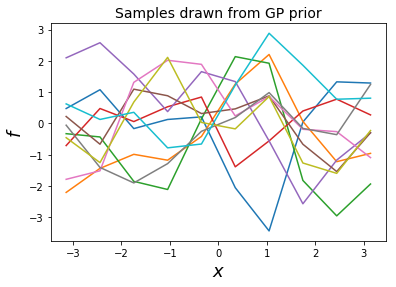

In [199]:
mu_prior, cov_prior = prior(x)
draw_and_plot_samples(x, mu_prior, cov_prior, num_samples=10, title='Samples drawn from GP prior')

In [200]:
# generate noiseless training data
x_train = np.linspace(-math.pi, math.pi, 10).reshape(-1, 1)
y_train = np.sin(x_train)

In [204]:
Kxx = kernel(x_train, x_train)
iKxx = np.linalg.cholesky(Kxx + beta*np.eye(x_train.shape[0]))
f_prior = np.dot(iKxx, np.random.normal(size=(x_train.shape[0], 3)))

In [206]:
# Compute the mean at our test points.
Kxs = kernel(x_train, x_test)
iKxs = np.linalg.solve(iKxx, Kxs)
mu = np.dot(iKxs.T, np.linalg.solve(iKxx, y_train)).reshape((n,))

In [207]:
# Compute the standard deviation so we can plot it
s2 = np.diag(Kss) - np.sum(iKxs**2, axis=0)
stdv = np.sqrt(s2)

# Draw samples from the posterior at our test points.
L = np.linalg.cholesky(Kss + 1e-6*np.eye(n) - np.dot(iKxs.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3)))

pl.plot(Xtrain, ytrain, 'bs', ms=8)
pl.plot(Xtest, f_post)
pl.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP posterior')
pl.show()

NameError: name 'K_ss' is not defined

In [171]:
# gaussian noise
obs_noise = np.random.normal(0, 0.2, x.shape)

In [172]:
# generate y data from x data and error
Y = np.sin(x) + obs_noise

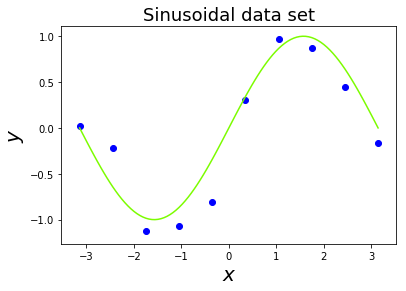

In [173]:
# create figure
plt.xlabel('$x$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.title('Sinusoidal data set', fontsize=18)
plt.plot(x_sin, np.sin(x_sin), color='lawngreen', label='Original sinewave') # plot original sinewave
plt.scatter(x, Y, color='b', label='Data points')
plt.show()

In [174]:
# calculate GP prior for given data set
def prior(x):
    mu = np.zeros(x.shape)
    K = np.exp( (-cdist(x, x)**2) / l) + ( gamma * np.eye((np.exp( (-cdist(x, x)**2) / l)).shape[0]) )
    return mu, K

def draw_and_plot_samples(x, mu, cov, num_samples, title):
    f = np.random.multivariate_normal(mu.flatten(), cov, num_samples)
    x1 = np.tile(x, (1, num_samples))
    plt.plot(x1, f.T)
    plt.xlabel('$x$',fontsize=18)
    plt.ylabel('$f$',fontsize=18)
    plt.title(title, fontsize=14)

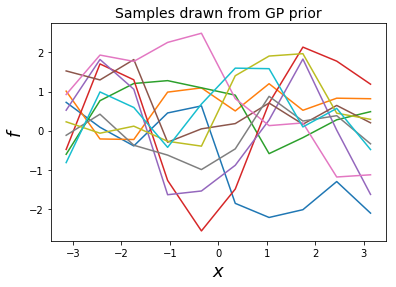

In [175]:
mu_prior, cov_prior = prior(x)
draw_and_plot_samples(x, mu_prior, cov_prior, num_samples=10, title='Samples drawn from GP prior')

In [176]:
# create new x data for prediction
x_star = np.linspace(-5, 5, 100).reshape(-1, 1)

In [177]:
def kernel(x1, x2):
    return np.exp((-cdist(x1, x2)**2) / l)

In [183]:
# calculation of matrices for m_n and s_n calculation
Kxx = kernel(x, x)
Kxs = kernel(x, x_star)
Kss = kernel(x_star, x_star)
Ksx = kernel(x_star, x)

#TODO: Cholesky decomposition
# iK = np.linalg.inv(Kxx + beta*np.eye(Kxx.shape[0]))
iK = np.linalg.cholesky(Kxx + beta*np.eye(Kxx.shape[0]))

mu = Ksx @ iK @ Y
cov = Kss - Ksx @ iK @ Kxs

n=Kxx.shape[0]
f_prior = np.dot(iK, np.random.normal(size=(n, 3)))

plt.plot(x1, f.T)
plt.xlabel('$x$',fontsize=18)
plt.ylabel('$f$',fontsize=18)
plt.title(title, fontsize=14)

# f = multivariate_normal.pdf(x_star, mean=mu.flatten(), cov=cov)

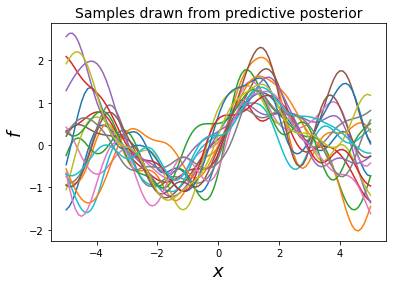

In [166]:
draw_and_plot_samples(x_star, mu, cov, num_samples=20, title="Samples drawn from predictive posterior")

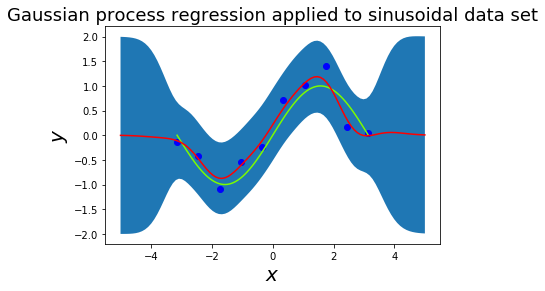

In [155]:
# create figure
var = np.diag(cov)
std = np.sqrt(abs(var))
plt.xlabel('$x$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.title('Gaussian process regression applied to sinusoidal data set',fontsize=18)
plt.fill_between(x_star.flatten(), mu.flatten()-2*std, mu.flatten()+2*std, label='$\pm$2 standard deviations of posterior')
plt.plot(x_sin, np.sin(x_sin), color='lawngreen', alpha=1, label='Original sinewave') # plot original sinewave
plt.scatter(x, Y ,color='b' ,label='Data points') # plot input data points x and Y (Y including noise)
plt.plot(x_star, mu, color='r', label='Mean of posterior') # plot mean of the Gaussian process predictive distribution
# plt.legend(fontsize=15)
plt.show()